In [1]:
from datasets import load_dataset
from transformers import pipeline
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the dataset
ds = load_dataset("Censius-AI/ECommerce-Women-Clothing-Reviews")

# Convert the dataset to a pandas DataFrame
df = ds['train'].to_pandas()

#preview relevant columns
df = df[['Clothing ID', 'Title', 'Review Text']].dropna()
df.rename(columns={'Review Text': 'review_text'}, inplace=True) 
df.rename(columns={'Clothing ID': 'product_id'}, inplace=True)


# Cleaning the review text removing whitespace
df['review_text'] = df['review_text'].str.strip()
df.head()




,product_id,Title,review_text
2,1077,Some major design flaws,I had such high hopes for this dress and reall...
3,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,Flattering shirt,This shirt is very flattering to all due to th...
5,1080,Not for the very petite,"I love tracy reese dresses, but this one is no..."
6,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...


In [3]:
# Initialize the text classification pipeline with a pre-trained model

pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

Device set to use mps:0


In [4]:
def classify_review(text):
    result = pipe(text[:512])[0]  # Limit to 512 characters
    return result['label'], round(result['score'],2)

# Apply the classification function to the review text
df[['sentiment', 'confidence']] = df['review_text'].apply(lambda x: pd.Series(classify_review(x)))

# Print the first few rows of the classified DataFrame
print(df.head())

   product_id                    Title  \
2        1077  Some major design flaws   
3        1049         My favorite buy!   
4         847         Flattering shirt   
5        1080  Not for the very petite   
6         858     Cagrcoal shimmer fun   

                                         review_text sentiment  confidence  
2  I had such high hopes for this dress and reall...  POSITIVE        0.99  
3  I love, love, love this jumpsuit. it's fun, fl...  POSITIVE        1.00  
4  This shirt is very flattering to all due to th...  POSITIVE        1.00  
5  I love tracy reese dresses, but this one is no...  NEGATIVE        0.88  
6  I aded this in my basket at hte last mintue to...  NEGATIVE        0.67  


In [5]:

# Classified DataFrame to a CSV file
df.to_csv('classified_reviews.csv', index=False)

/var/folders/n1/yjkfys6s40zdd3l3kfxk98380000gn/T/ipykernel_93828/3812780505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


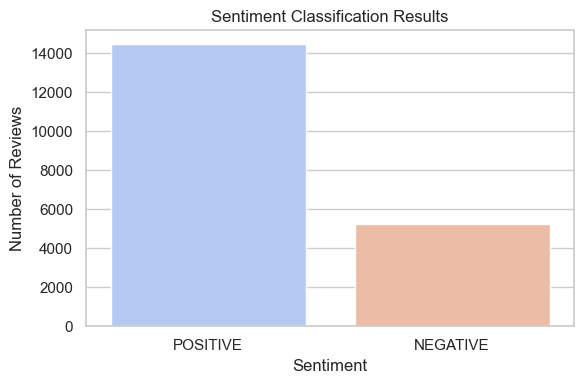

In [6]:
# Set style
sns.set(style="whitegrid")

# Create a count plot for sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Classification Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()

# save plot to a file
plt.savefig('sentiment_distribution.png', dpi=300)
plt.show()

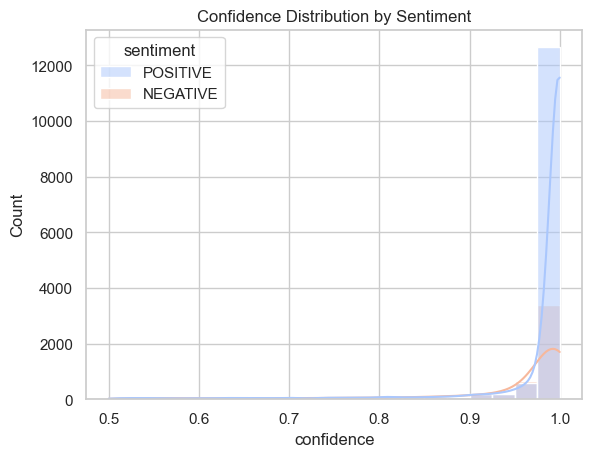

In [7]:
# Confidence distribution plot
sns.histplot(data=df, x='confidence', hue='sentiment', bins=20, kde=True, palette='coolwarm')
plt.title('Confidence Distribution by Sentiment')

plt.savefig('confidence_distribution_by_Sentiment.png', dpi=300)
plt.show()

In [8]:
# Dropdown widgets by product ID and sentiment with pie chart visualization

 # view 'ALL' as an option in the dropdown
product_ids = ['ALL'] + sorted(df['product_id'].unique())
sentiments = ['ALL', 'POSITIVE', 'NEGATIVE']

# Create dropdown widgets
product_dropdown = widgets.Dropdown(
    options=product_ids,
    description='Product ID:',
)
sentiment_dropdown = widgets.Dropdown(
    options=sentiments,
    description='Sentiment:',
)
# Function to filter DataFrame based on dropdown selections
def filter_reviews(product_id, sentiment):
    filtered_df = df.copy()

    if product_id != 'ALL':
        filtered_df = filtered_df[filtered_df['product_id'] == product_id]
    if sentiment != 'ALL':
        filtered_df = filtered_df[filtered_df['sentiment'] == sentiment]
    if filtered_df.empty:
        return display("No reviews found for the selected filters.")
    
    display(filtered_df[['product_id', 'review_text', 'sentiment', 'confidence']].reset_index(drop=True)) 
    
    # pie chart visualization
    sentiment_counts = filtered_df['sentiment'].value_counts()
    colors = ['#66b3ff', '#ff9999']

    plt.figure(figsize=(4.5, 4.5))
    plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Sentiment Distribution for Selected Filters')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.show()


# Run the filter function and display results
widgets.interact(filter_reviews, product_id = product_dropdown, sentiment = sentiment_dropdown)

                               


interactive(children=(Dropdown(description='Product ID:', options=('ALL', np.int64(1), np.int64(2), np.int64(4…

<function __main__.filter_reviews(product_id, sentiment)>